# Collect image data 
when click on 's' save image and when click on 'q' it will quit

In [ ]:
import cv2
import os

# Create a folder to save images if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Initialize the camera
cap = cv2.VideoCapture('m1.mp4')

# # Set the width and height of the captured frame
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

image_counter = 0

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Display the captured frame
    cv2.imshow('Frame', frame)

    # Wait for 's' key to save the frame as an image
    key = cv2.waitKey(1) & 0xFF
    if key == ord('s'):
        image_name = f'images/image_{image_counter}.jpg'
        cv2.imwrite(image_name, frame)
        print(f"Image {image_name} saved!")
        image_counter += 1
    # Press 'q' to exit
    elif key == ord('q'):
        break

# Release the camera and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Socket server to get image and save in a folder (part a)

In [ ]:
import socket
from PIL import Image
from io import BytesIO
counter = 1
def save_image(image_data, filename="received_image.jpg"):
    global counter
    image = Image.open(BytesIO(image_data))
    image.save(f'images/{counter}'+filename)
    counter+=1
def main():
    # Define the host and port to listen on
    host = "127.0.0.1"  # localhost
    port = 12345

    # Create a socket object
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

    # Bind the socket to the address and port
    server_socket.bind((host, port))

    # Listen for incoming connections
    server_socket.listen(1)

    print("Server is listening on {}:{}".format(host, port))

    while True:
        # Accept a connection
        client_socket, client_address = server_socket.accept()
        print("Connection from:", client_address)

        # Receive image data
        image_data = b""
        while True:
            chunk = client_socket.recv(1024)
            if not chunk:
                break
            image_data += chunk

        # Save the image
        save_image(image_data)

        print("Image saved as 'received_image.jpg'")

        # Close the connection
        client_socket.close()

if __name__ == "__main__":
    main()
    

## Test server (part b)

In [ ]:
import cv2
import socket

def send_frame(frame, server_ip, server_port):
    # Convert the frame to bytes
    _, img_encoded = cv2.imencode('.jpg', frame)
    img_bytes = img_encoded.tobytes()

    # Create a socket object
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

    # Connect to the server
    client_socket.connect((server_ip, server_port))

    # Send the image data
    client_socket.sendall(img_bytes)

    # Close the connection
    client_socket.close()



# Define the server IP and port
server_ip = "127.0.0.1"
server_port = 12354

# Define the video file path
video_path = "m1.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open the video file")

#### working one
# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Send the frame to the server
#     send_frame(frame, server_ip, server_port)

# # Release the video capture object
# cap.release()

######## send image when click on 's'
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Display the captured frame
    cv2.imshow('Frame', frame)
    # Wait for 's' key to save the frame as an image
    key = cv2.waitKey(1) & 0xFF
    if key == ord('s'):
        send_frame(frame, server_ip, server_port)
        # image_name = f'images/image_{image_counter}.jpg'
        # cv2.imwrite(image_name, frame)
        # print(f"Image {image_name} saved!")
        # image_counter += 1
    # Press 'q' to exit
    elif key == ord('q'):
        break

# Release the camera and close OpenCV windows
cap.release()
cv2.destroyAllWindows()



# Counting
Start counting when click on "start" and stop counting when click on stop 

In [ ]:
import streamlit as st
import time

def main():
    st.title("Streamlit App")

    count = st.empty()
    start_button = st.button("Start")
    stop_button = st.button("Stop")
    
    running = False
    counter = 0

    while True:
        if start_button:
            running = True
            start_button = False  # Reset the button state
            stop_button = False   # Ensure stop button is inactive when starting
            while running:
                counter += 1
                count.write("Count: {}".format(counter))
                time.sleep(1)
                if stop_button:
                    running = False
                    count.write("Counting stopped.")
                    time.sleep(1)
                    break
                # start_button = st.button("Start", key="start_button")  # Re-enable start button if needed
                # stop_button = st.button("Stop", key="stop_button")    # Re-enable stop button if needed
        else:
            time.sleep(0.1)  # Reduce CPU usage while waiting for start button

if __name__ == "__main__":
    main()

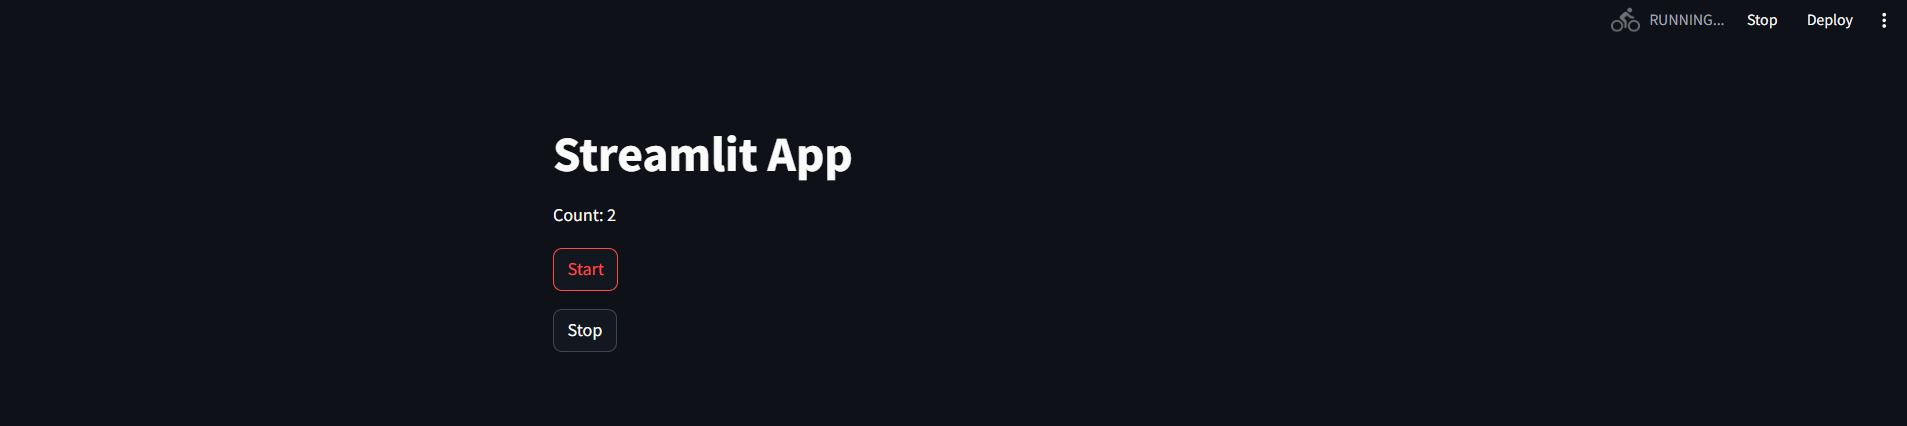 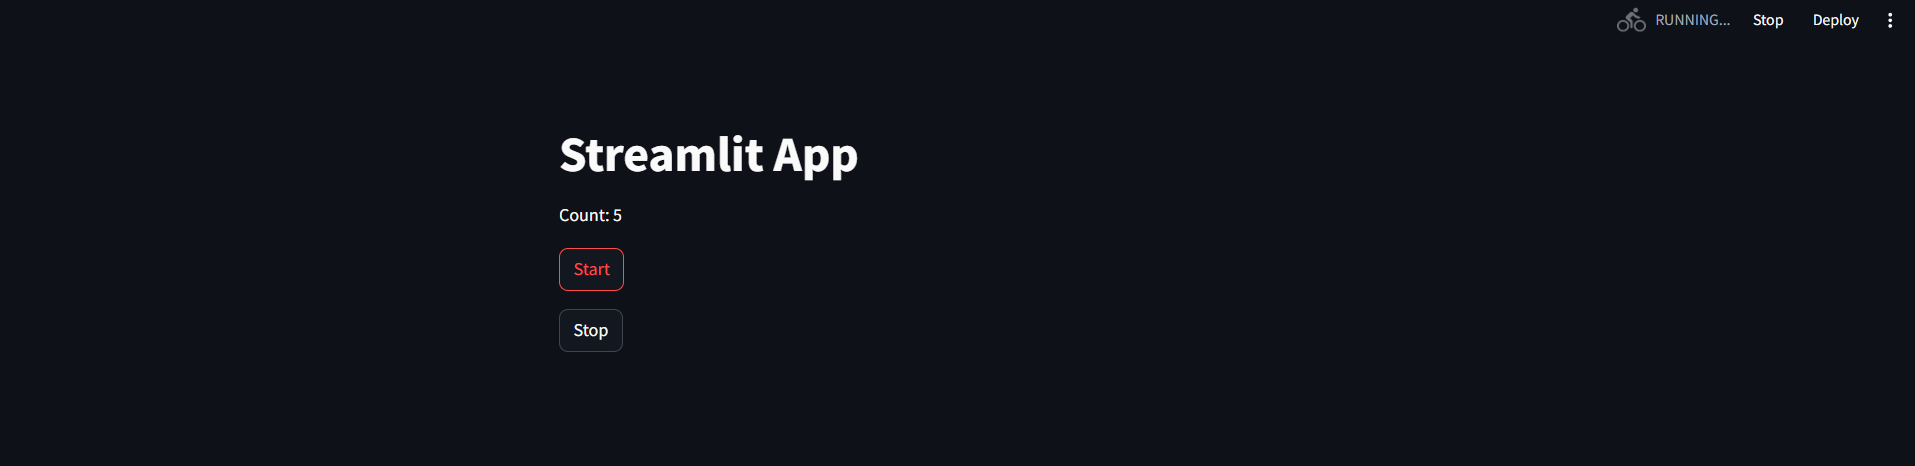 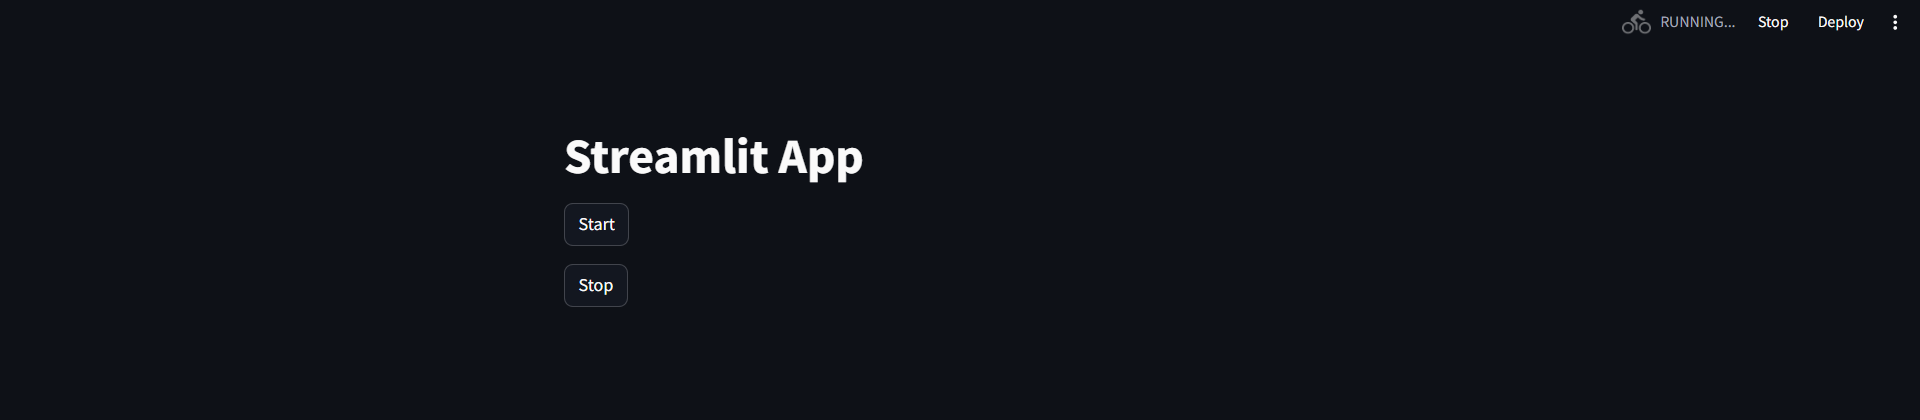

# Send image to streamlit

In [ ]:
########## wroking on image

from flask import Flask, send_file
import cv2
import numpy as np
from PIL import Image
import io

app = Flask(__name__)

@app.route('/get_image', methods=['GET'])
def get_image():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(frame)
    byte_arr = io.BytesIO()
    im_pil.save(byte_arr, format='JPEG')
    byte_arr = byte_arr.getvalue()
    return send_file(io.BytesIO(byte_arr), mimetype='image/jpeg')

if __name__ == '__main__':
    app.run(debug=True, port=8897)

